In [25]:
import yfinance as yf

ticker = 'ICICIBANK.NS'
start_date = '2022-01-01'
end_date = '2024-02-21'

df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [26]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import os

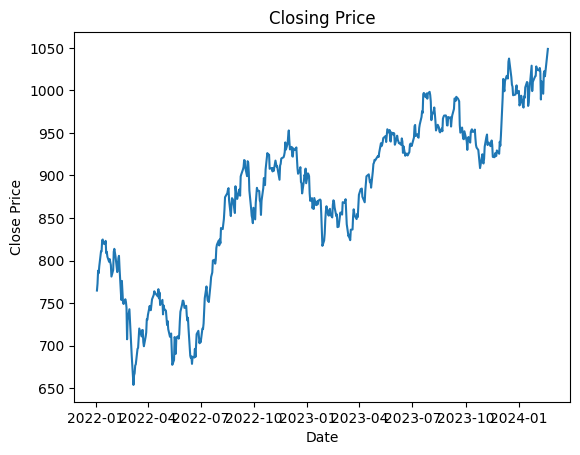

In [27]:
plt.figure()
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')

# Specify the path to the "images" folder
images_folder = 'images\ClosePriceGraph'
os.makedirs(images_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Save the plot with the name of the ticker in the "images" folder
filename = os.path.join(images_folder, f'{ticker}.png')
plt.savefig(filename)

# Show the plot (optional)
plt.show()

In [28]:
import math

data=df.filter(['Close'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

423

In [29]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.28088611],
       [0.30151893],
       [0.33999997],
       [0.33240503],
       [0.35316456],
       [0.39746835],
       [0.39721525],
       [0.43037975],
       [0.43278484],
       [0.42088608],
       [0.41911389],
       [0.42873412],
       [0.39202525],
       [0.39620253],
       [0.38164557],
       [0.36632914],
       [0.37443044],
       [0.35670892],
       [0.32253171],
       [0.3418987 ],
       [0.39632908],
       [0.40506329],
       [0.39291142],
       [0.38303794],
       [0.33582285],
       [0.35126582],
       [0.37734174],
       [0.38417722],
       [0.34696199],
       [0.25303801],
       [0.30962022],
       [0.27924048],
       [0.2445569 ],
       [0.24088614],
       [0.25493674],
       [0.24696199],
       [0.22999994],
       [0.13582285],
       [0.19316453],
       [0.2251899 ],
       [0.15468348],
       [0.11278478],
       [0.08683541],
       [0.        ],
       [0.02848101],
       [0.03468358],
       [0.05784804],
       [0.061

In [30]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(70, len(train_data)):
    x_train.append(train_data[i-70:i,0])
    y_train.append(train_data[i,0])
    if i<=70:
        print(x_train)
        print(y_train)
        print()

[array([0.28088611, 0.30151893, 0.33999997, 0.33240503, 0.35316456,
       0.39746835, 0.39721525, 0.43037975, 0.43278484, 0.42088608,
       0.41911389, 0.42873412, 0.39202525, 0.39620253, 0.38164557,
       0.36632914, 0.37443044, 0.35670892, 0.32253171, 0.3418987 ,
       0.39632908, 0.40506329, 0.39291142, 0.38303794, 0.33582285,
       0.35126582, 0.37734174, 0.38417722, 0.34696199, 0.25303801,
       0.30962022, 0.27924048, 0.2445569 , 0.24088614, 0.25493674,
       0.24696199, 0.22999994, 0.13582285, 0.19316453, 0.2251899 ,
       0.15468348, 0.11278478, 0.08683541, 0.        , 0.02848101,
       0.03468358, 0.05784804, 0.0611393 , 0.10734183, 0.11037969,
       0.13734177, 0.16797462, 0.1443038 , 0.16316459, 0.16341769,
       0.12772155, 0.11518987, 0.14329108, 0.15582275, 0.19531652,
       0.19379744, 0.20886076, 0.23506323, 0.22291136, 0.222405  ,
       0.23999997, 0.25455693, 0.26797462, 0.27873412, 0.27468354])]
[0.2634176906151109]



In [31]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(353, 70, 1)

In [33]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(LSTM(100, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(50,activation='relu'))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1,activation='relu'))

In [34]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=50 )

Epoch 1/50
353/353 [==============================] - 12s 23ms/step - loss: 0.0076
Epoch 2/50
353/353 [==============================] - 9s 24ms/step - loss: 0.0032
Epoch 3/50
353/353 [==============================] - 9s 25ms/step - loss: 0.0027
Epoch 4/50
353/353 [==============================] - 9s 24ms/step - loss: 0.0019
Epoch 5/50
353/353 [==============================] - 9s 24ms/step - loss: 0.0015
Epoch 6/50
353/353 [==============================] - 9s 25ms/step - loss: 0.0020
Epoch 7/50
353/353 [==============================] - 17s 48ms/step - loss: 0.0011
Epoch 8/50
353/353 [==============================] - 11s 30ms/step - loss: 0.0012
Epoch 9/50
353/353 [==============================] - 9s 24ms/step - loss: 0.0012
Epoch 10/50
353/353 [==============================] - 9s 27ms/step - loss: 9.4034e-04
Epoch 11/50
353/353 [==============================] - 12s 34ms/step - loss: 0.0011
Epoch 12/50
353/353 [==============================] - 11s 30ms/step - loss: 0.0010
Epoc

In [36]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-70: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(70, len(test_data)):
    x_test.append(test_data[i-70:i,0])

In [37]:
#Convert the data to a numpy array

x_test=np.array(x_test)

In [38]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [39]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


4/4 [==============================] - 1s 27ms/step


C:\Users\soham\AppData\Local\Temp\ipykernel_28628\988778884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


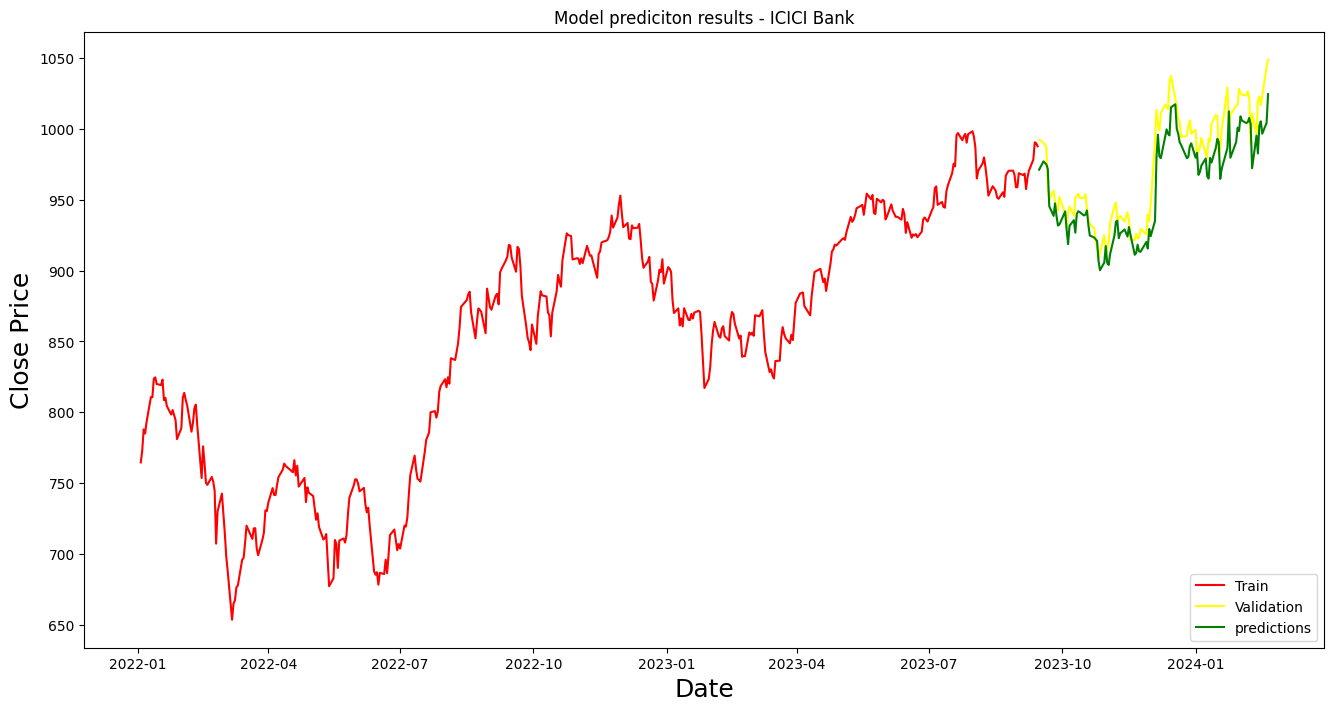

In [40]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model prediciton results - ICICI Bank')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'] , color='red')
plt.plot(valid['Close'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
# Specify the path to the "images" folder
images_folder = 'images\lstmgraph'
os.makedirs(images_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Save the plot with the name of the ticker in the "images" folder
filename = os.path.join(images_folder, f'{ticker}.png')
plt.savefig(filename)

# Show the plot (optional)
plt.show()

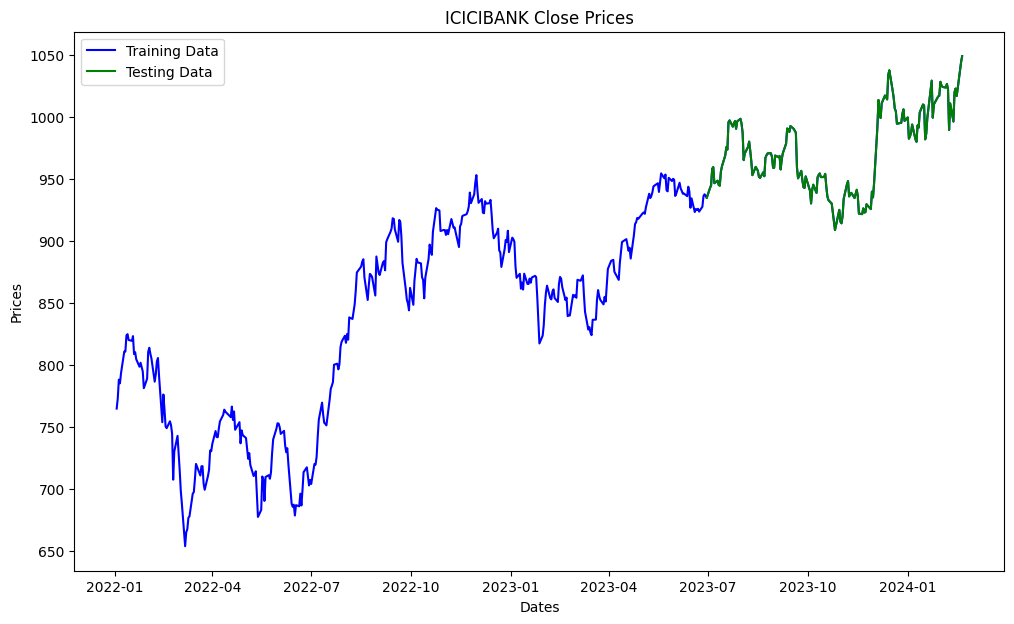

In [41]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
plt.figure(figsize=(12,7))
plt.title('ICICIBANK Close Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()

In [43]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
    model = ARIMA(history, order=(5, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)




<class 'list'>


C:\Users\soham\AppData\Local\Temp\ipykernel_28628\1713118158.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Close'],'green', color='blue', label='Training Data')


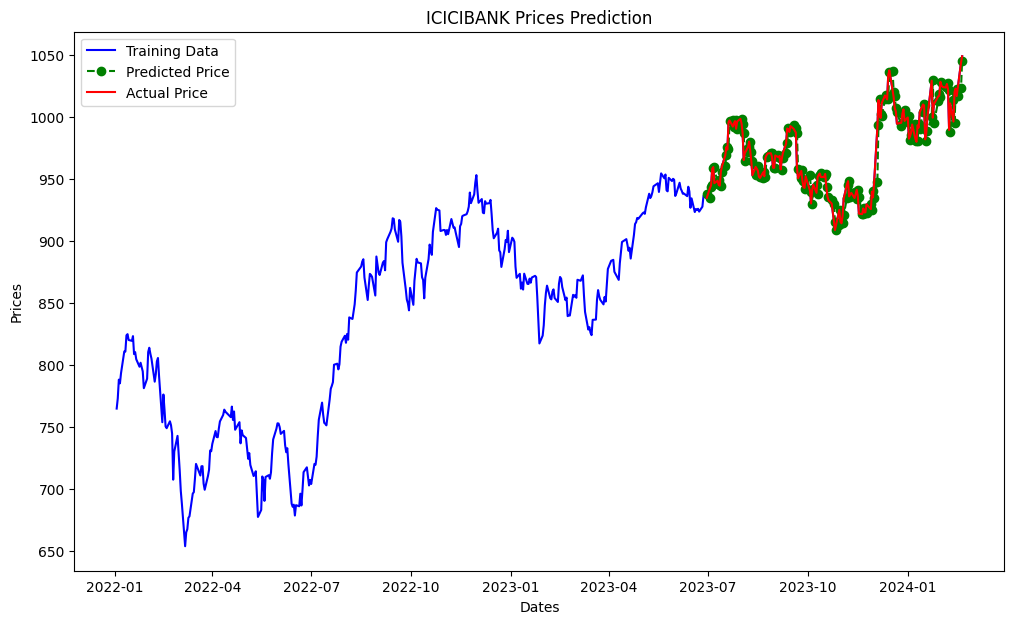

In [45]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('ICICIBANK Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
# Specify the path to the "images" folder
images_folder = 'images/arimagraph'
os.makedirs(images_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Save the plot with the name of the ticker in the "images" folder
filename = os.path.join(images_folder, f'{ticker}.png')
plt.savefig(filename)

# Show the plot (optional)
plt.show()

In [46]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200 / (np.abs(y_pred) + np.abs(y_true))))

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
predictions = list()

# SARIMA order
order = (1, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 12)  # SARIMA seasonal order (adjust the seasonal component as needed)

for t in range(len(test_ar)):
    model = SARIMAX(history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False, method='powell', maxiter=1000)
    output = model_fit.get_forecast(steps=1)
    yhat = output.predicted_mean[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)



C:\Users\soham\AppData\Local\Temp\ipykernel_28628\2642752192.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Close'],'green', color='blue', label='Training Data')


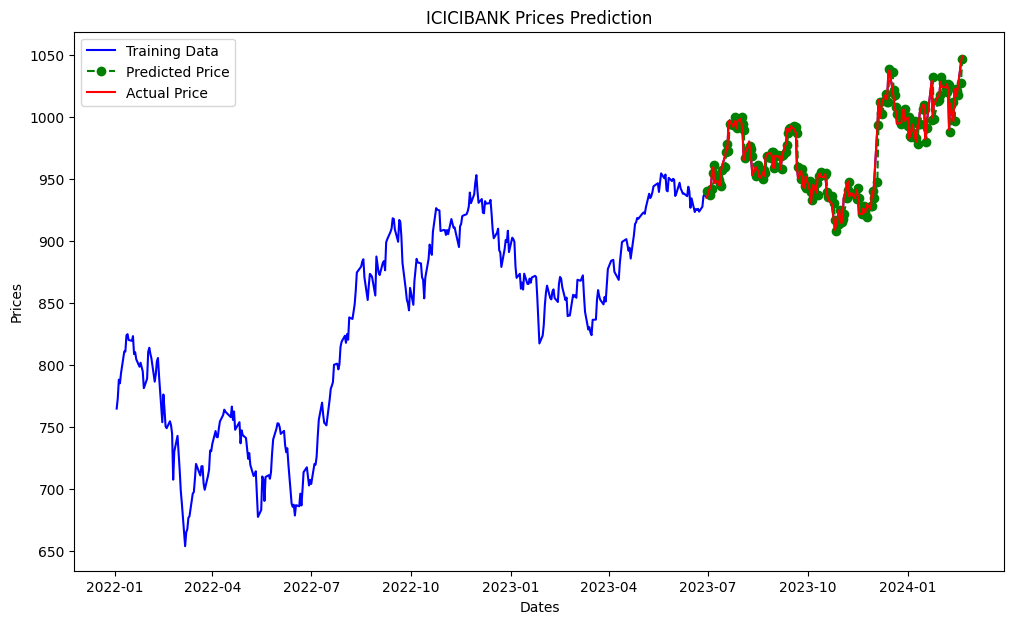

In [47]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('ICICIBANK Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
images_folder = 'images\sarimagraph'
os.makedirs(images_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Save the plot with the name of the ticker in the "images" folder
filename = os.path.join(images_folder, f'{ticker}.png')
plt.savefig(filename)

# Show the plot (optional)
plt.show()
